<a href="https://colab.research.google.com/github/riblidezso/wigner_dl_demo/blob/master/nb_01_baby_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Baby steps in deep learning



### Load useful python packages

In [1]:
# plotting and numerical basics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# machine learning baselines
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
# keras deep learning framework (with tensorflow backend)
import keras
from keras.models import Model
import keras.layers as kl
import keras.regularizers as kr
import keras.optimizers as ko

Using TensorFlow backend.


# MNIST handwritten digits dataset

In [0]:
from keras.datasets import mnist
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Check some handwritten digits

Label: 9


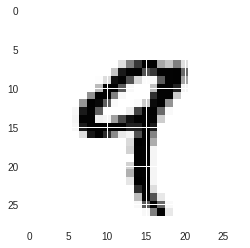

In [56]:
i = 4
imshow(x_train[i])
print('Label:', y_train[i] )

### Some more info about the dataset

In [57]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Normalize pixel values to 0-1 range

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

## Define functions for 'simple' machine learning baselines

In [0]:
def train_baseline(model, x_train, y_train, N_train=60000, **kwargs):
  """Train a baseline sklearn model."""
  x_train_flat = x_train.reshape(x_train.shape[0],-1)  # flatten
  clf = model(**kwargs)  # init machine learning model
  clf.fit(x_train_flat[:N_train],y_train[:N_train])  # train it
  return clf


def test_baseline(clf, x_test, y_test):
  """Evaluate a baseline sklearn model."""
  x_test_flat = x_test.reshape(x_test.shape[0],-1)  # flatten
  y_pred = clf.predict(x_test_flat)  # make predictions
  acc = np.equal(y_pred, y_test).mean()  # calculate accuracy
  print(clf.__class__.__name__, 'accuracy',acc)

### Test logistic regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)

In [91]:
%%time
clf = train_baseline(LogisticRegression, x_train, y_train)
test_baseline(clf, x_test, y_test)

LogisticRegression accuracy 0.9201
CPU times: user 2min 21s, sys: 95.8 ms, total: 2min 21s
Wall time: 2min 21s


### Test Random Forest

[Random Forest](https://en.wikipedia.org/wiki/Random_forest)

In [95]:
%%time
clf = train_baseline(RandomForestClassifier, x_train, y_train,
                    n_jobs=-1, n_estimators = 300)
test_baseline(clf, x_test, y_test)

RandomForestClassifier accuracy 0.971
CPU times: user 4min 14s, sys: 448 ms, total: 4min 15s
Wall time: 2min 10s


### Test a simple neural network

In [105]:
%%time
clf = train_baseline(MLPClassifier, x_train, y_train)
test_baseline(clf, x_test, y_test)

MLPClassifier accuracy 0.9776
CPU times: user 2min 11s, sys: 39.3 s, total: 2min 50s
Wall time: 1min 26s


In [106]:
# see the params
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Implement our own neural network for more control!

In [151]:
N1 = 100
inp = kl.Input(shape=(28*28,),name='input')  # the input data tensor
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dense(10, activation='softmax')(x)  # prediction layer
clf = Model(inputs=inp, outputs=x)  # define the model
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [153]:
# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1), y_train, epochs=10,batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4828 - acc: 0.8703 - val_loss: 0.2485 - val_acc: 0.9317
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2171 - acc: 0.9395 - val_loss: 0.1824 - val_acc: 0.9470
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1635 - acc: 0.9539 - val_loss: 0.1457 - val_acc: 0.9582
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1323 - acc: 0.9628 - val_loss: 0.1264 - val_acc: 0.9621
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1109 - acc: 0.9688 - val_loss: 0.1153 - val_acc: 0.9654
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0949 - acc: 0.9734 - val_loss: 0.1058 - val_acc: 0.9684
Epoch 7/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0828 - acc: 0.9767 - val_loss: 0.0991 - val_acc

## Try a larger network? 

In [154]:
N1,N2 = 1024,512
inp = kl.Input(shape=(28*28,),name='input')
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dropout(0.25)(x)
x = kl.Dense(N2, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.25)(x)
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [156]:
# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1),y_train, epochs=10, batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3121 - acc: 0.9073 - val_loss: 0.1112 - val_acc: 0.9663
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1312 - acc: 0.9605 - val_loss: 0.0808 - val_acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0993 - acc: 0.9685 - val_loss: 0.0826 - val_acc: 0.9739
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0804 - acc: 0.9747 - val_loss: 0.0646 - val_acc: 0.9805
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0692 - acc: 0.9783 - val_loss: 0.0652 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0594 - acc: 0.9814 - val_loss: 0.0618 - val_acc: 0.9817
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0543 - acc: 0.9826 - val_loss: 0.0619 - val_acc

# Convolutional neural networks!

In [0]:
# need to create 1 ' color channel'
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [160]:
N1,N2,N3 = 32,64,128
inp = kl.Input(shape=(28,28,1),name='input')
x = kl.Conv2D(N1, kernel_size=(3, 3), activation='relu')(inp)
x = kl.Conv2D(N1, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Dropout(0.25)(x)
x = kl.Flatten()(x)
x = kl.Dense(N3, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.5)(x)
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)          0         
__________

In [161]:
# Train it
clf.fit(x_train,y_train, epochs=10, validation_split=0.1, batch_size=256,
        validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 142us/step - loss: 0.3722 - acc: 0.8816 - val_loss: 0.0545 - val_acc: 0.9824
Epoch 2/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0936 - acc: 0.9719 - val_loss: 0.0352 - val_acc: 0.9877
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0660 - acc: 0.9799 - val_loss: 0.0280 - val_acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0515 - acc: 0.9841 - val_loss: 0.0269 - val_acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0448 - acc: 0.9869 - val_loss: 0.0262 - val_acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0393 - acc: 0.9882 - val_loss: 0.0260 - val_acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0345 - acc: 0.9896 - val_loss: 0.0249 - 

---


# 97.5 or 99.4 meh? Let's see a more impressive example: CIFAR10

2.5% vs 0.6% not so meh btw

[CIFAR10 website](https://www.cs.toronto.edu/~kriz/cifar.html)

In [4]:
from keras.datasets import cifar10
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
mnist_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                 'horse','ship', 'truck']

170500096/170498071 [==============================] - 59s 0us/step


## Test yourself at home! 

I can do around 96%

Label: horse


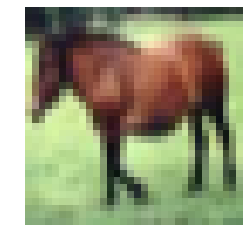

In [5]:
i = 7
imshow(x_train[i])
plt.axis('off')
print('Label:', mnist_classes[ int(y_train[i]) ])

#### Some info

In [6]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### Normalize data

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

### Baselines

Logistic regression takes forever!

In [181]:
%%time
clf = train_baseline(RandomForestClassifier, x_train, y_train.flatten(),
                    n_jobs=-1, n_estimators = 100)
test_baseline(clf, x_test, y_test.flatten())

RandomForestClassifier accuracy 0.467
CPU times: user 6min 44s, sys: 0 ns, total: 6min 44s
Wall time: 3min 26s


# OK, so this is much harder. Let's see neural nets!

### First a simple MLP 

In [11]:
N1 = 200
inp = kl.Input(shape=(32*32*3,),name='input')  # the input data tensor
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dense(10, activation='softmax')(x)  # prediction layer
clf = Model(inputs=inp, outputs=x)  # define the model
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
print(clf.summary())

# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1), y_train, epochs=10,batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.9453 - acc: 0.3062 - val_loss: 1.8307 - val_acc: 0.3483
Epoch 2/10
50000/50000 [==============================] - 2s 30us/step - loss: 1.7767 - acc: 0.3722 - val_loss: 1.7414 - val_acc: 0.3813
Epoch 3/10
50000/50000 [==============================] - 2s 30us/step 

### Maybe a larger one?

In [15]:
N1,N2 = 1024,512
inp = kl.Input(shape=(32*32*3,),name='input')
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dropout(0.25)(x)
x = kl.Dense(N2, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.25)(x)
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
print(clf.summary())

# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1), y_train, epochs=20,batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


## Convolutional, the same as before?

In [21]:
N1,N2,N3 = 32,64,128
inp = kl.Input(shape=(32,32,3),name='input')
x = kl.Conv2D(N1, kernel_size=(3, 3), activation='relu')(inp)
x = kl.Conv2D(N1, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Dropout(0.25)(x)
x = kl.Flatten()(x) 
x = kl.Dense(N3, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.5)(x)
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [22]:
# Train it
clf.fit(x_train,y_train, epochs=30, validation_split=0.1, batch_size=256,
        validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 168us/step - loss: 1.7983 - acc: 0.3360 - val_loss: 1.5424 - val_acc: 0.4422
Epoch 2/30
50000/50000 [==============================] - 7s 146us/step - loss: 1.4371 - acc: 0.4792 - val_loss: 1.2297 - val_acc: 0.5547
Epoch 3/30
50000/50000 [==============================] - 7s 146us/step - loss: 1.2716 - acc: 0.5477 - val_loss: 1.1403 - val_acc: 0.5921
Epoch 4/30
50000/50000 [==============================] - 7s 146us/step - loss: 1.1690 - acc: 0.5865 - val_loss: 1.0914 - val_acc: 0.6122
Epoch 5/30
50000/50000 [==============================] - 7s 146us/step - loss: 1.0780 - acc: 0.6185 - val_loss: 0.9853 - val_acc: 0.6547
Epoch 6/30
50000/50000 [==============================] - 7s 147us/step - loss: 1.0235 - acc: 0.6406 - val_loss: 0.9572 - val_acc: 0.6627
Epoch 7/30
50000/50000 [==============================] - 7s 146us/step - loss: 0.9662 - acc: 0.6598 - val_loss: 0.8816 - 

# State of the art is around 97.88% [ArXiv link](https://arxiv.org/abs/1709.01507)


### Implementation for one of the state of the art: [ResNext](https://arxiv.org/abs/1611.05431)

![resnext](https://cdn-images-1.medium.com/max/1600/1*mdiQTfovOXKnqzfj727b9Q.png)


Does not achieve the described results, tell me if you find the mistake :)

In [18]:
#!/usr/bin/env python
"""
Train resnext of cifar10.
The implementation follows the FAIR github repo:
https://github.com/facebookresearch/ResNeXt
which is slightly different than the arxiv report.
Here I use the non-preactivation blocks.
The specfic settings (lr,batch size ) can be changed 
to follow the original values (with enough GPUs, and time).
Author: Dezso Ribli
"""

CARDINALITY = 16
LR = 0.0125
BATCH_SIZE = 32
EPOCHS_DROP = [150,225]
N_EPOCHS = 250
AUG = True

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import optimizers
import math


def resnext(inp, resxt_block, cardinality=4):
    """Return resnext."""
    # inital conv
    x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(5e-4))(inp)
    x = Activation('relu')(BatchNormalization()(x))
    # residual blocks
    x = resxt_blocks(x, resxt_block, cardinality, 64, 256, 1)
    x = resxt_blocks(x, resxt_block, cardinality, 128, 512, 2)
    x = resxt_blocks(x, resxt_block, cardinality, 256, 1024, 2)
    # classifier
    x = GlobalAveragePooling2D()(x)
    x = Dense(10,activation='softmax')(x)
    model = Model(inputs=inp, outputs=x)
    return model


def resxt_blocks(x, resxt_block, cardinality, n_ch1, n_ch2, init_stride, 
                 n_block=3):
    """Perform same size residual blocks."""
    x_shortcut = Conv2D(n_ch2, (1, 1), strides = init_stride, 
                        padding='same', kernel_regularizer=l2(5e-4))(x)
    x_shortcut = BatchNormalization()(x_shortcut)
    # first block
    x = resxt_block(x, x_shortcut, cardinality, n_ch1, n_ch2, init_stride)
    for i in range(n_block-1):  # the other residual blocks
        x = resxt_block(x, x, cardinality, n_ch1, n_ch2)
    return x
         

def resxt_block_a(x, x_shortcut, cardinality, n_ch1, n_ch2, init_stride=1):
    """Perform a residual block."""
    groups=[]
    for i in range(cardinality):
        y = Conv2D(n_ch1, (1, 1), strides=init_stride, 
                   kernel_regularizer=l2(5e-4), padding='same')(x)
        y = Activation('relu')(BatchNormalization()(y))
        y = Conv2D(n_ch1, (3, 3), padding='same', 
                   kernel_regularizer=l2(5e-4),)(y)
        y = Activation('relu')(BatchNormalization()(y))
        y = Conv2D(n_ch2, (1, 1), padding='same', 
                   kernel_regularizer=l2(5e-4),)(y)
        y = BatchNormalization()(y)
        groups.append(y)
    x = tf.keras.layers.add(groups)
    x = tf.keras.layers.add([x, x_shortcut])
    x = Activation('relu')(x)
    return x   


def resxt_block_b(x, x_shortcut, cardinality, n_ch1, n_ch2, init_stride=1):
    """Perform a residual block."""
    groups=[]
    for i in range(cardinality):
        y = Conv2D(n_ch1, (1, 1), strides=init_stride, 
                   kernel_regularizer=l2(5e-4), padding='same')(x)
        y = Activation('relu')(BatchNormalization()(y))
        y = Conv2D(n_ch1, (3, 3), padding='same', 
                   kernel_regularizer=l2(5e-4),)(y)
        y = Activation('relu')(BatchNormalization()(y))
        groups.append(y)
    x = tf.keras.layers.concatenate(groups)
    x = Conv2D(n_ch2, (1, 1), padding='same', 
               kernel_regularizer=l2(5e-4),)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.add([x, x_shortcut])
    x = Activation('relu')(x)
    return x   


def norm(x):
    """Normalize images."""
    x = x.astype('float32')
    x[...,0] = (x[...,0] - x[...,0].mean())/x[...,0].std()
    x[...,1] = (x[...,1] - x[...,1].mean())/x[...,1].std()
    x[...,2] = (x[...,2] - x[...,2].mean())/x[...,2].std()
    return x


def step_decay(epoch, base_lr=LR, drop=0.1, epochs_drops=EPOCHS_DROP):
    """Helper for step learning rate decay."""
    lrate = base_lr
    for epoch_drop in epochs_drops:
        lrate *= math.pow(drop,math.floor(epoch/epoch_drop))
        return lrate



# SGD
sgd = optimizers.SGD(lr=LR, decay=0, momentum=0.9, nesterov=True)

# resnext
res = resnext(Input(shape=(32,32,3)), resxt_block_b, CARDINALITY)
res.compile(loss='sparse_categorical_crossentropy',
            optimizer=sgd, metrics=['accuracy'])
print(res.summary())  # print summary

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = map(norm, (x_train, x_test))  # normalize

# train on generator with standard data augmentation
gen = ImageDataGenerator(width_shift_range=0.125,
                         height_shift_range=0.125,
                         horizontal_flip=True)
train_generator = gen.flow(x_train, y_train,
                           batch_size=BATCH_SIZE)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_104 (Conv2D)             (None, 32, 32, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_104 (BatchN (None, 32, 32, 64)   256         conv2d_104[0][0]                 
__________________________________________________________________________________________________
activation_99 (Activation)      (None, 32, 32, 64)   0           batch_normalization_104[0][0]    
__________________________________________________________________________________________________
conv2d_106

In [0]:
import tensorflow as tf

import os
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    res,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)
tpu_model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

def train_gen(batch_size):
  while True:
    offset = np.random.randint(0, x_train.shape[0] - batch_size)
    yield x_train[offset:offset+batch_size], y_train[offset:offset + batch_size]
    

tpu_model.fit_generator(
    train_gen(1024),
    epochs=10,
    steps_per_epoch=100,
    validation_data=(x_test, y_test),
)

INFO:tensorflow:Querying Tensorflow master (b'grpc://10.64.207.178:8470') for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 8065862604663355995)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 7057174356852335249)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_GPU:0, XLA_GPU, 17179869184, 12983671754582972407)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 14956557699162281848)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 9481520361037722495)
INFO:tensorflow:*** Available Device: _Devic